![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39117173-a433bf6a-46e6-11e8-8a40-b4d4d6422493.jpg"
    style="width:200px; float: right; margin: 0 40px 40px 40px;"></img>

# Missing values in Pandas

pandas borrows all the capabilities from numpy selection + adds a number of convenient methods to handle missing values.

To detect missing values easier (and across different array dtypes), pandas provides some useful functions, which are also methods on Series and DataFrame objects.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Pandas utility functions

Similarly to `numpy`, pandas also has a few utility functions to identify and detect null values:

In [2]:
pd.isnull(np.nan)

True

In [3]:
pd.isnull(None)

True

In [4]:
pd.isna(np.nan)

True

In [5]:
pd.isna(None)

True

The opposite ones also exist:

In [6]:
pd.notnull(None)

False

In [7]:
pd.notna(None)

False

In [8]:
pd.notnull(np.nan)

False

In [9]:
pd.notnull(3)

True

These functions also work with Series and `DataFrame`s:

In [10]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [11]:
pd.isna(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [12]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [13]:
pd.notna(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Analizing missing data on DataFrames

Now we'll go a step further and analyze the following DataFrame:

In [14]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 7, 5, np.nan],
    'Column B': [np.nan, 2, 3, 6, 1],
    'Column C': [np.nan, 2, np.nan, 5, 8],
    'Column D': [1, 2, 5, 9, 3],
    'Column E': [np.nan, np.nan, np.nan, np.nan, np.nan]
})

df

,Column A,Column B,Column C,Column D,Column E
0,1.0,NaN,NaN,1,NaN
1,NaN,2.0,2.0,2,NaN
2,7.0,3.0,NaN,5,NaN
3,5.0,6.0,5.0,9,NaN
4,NaN,1.0,8.0,3,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## info

The <b>info</b> pandas function give us a concise summary of a DataFrame where we can see to total number of entries and quick information about how many _non-null_ values we have per column:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
Column A    3 non-null float64
Column B    4 non-null float64
Column C    3 non-null float64
Column D    5 non-null int64
Column E    0 non-null float64
dtypes: float64(4), int64(1)
memory usage: 280.0 bytes


As we can see, `Column A` has _"3 non-null float64"_ values, and we have 5 total items (`RangeInex: 5 entries`). That means that there are 2 null values.

> Another useful check is "summing" the result of `isna` to get a count of null values. We'll see it in a while.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## isna / isnull

To find out missing values, we can use the `isna()` or `isnull()` functions to mark all of the `NaN` values in the dataset as `True`.

In [16]:
df.isna()

,Column A,Column B,Column C,Column D,Column E
0,False,True,True,False,True
1,True,False,False,False,True
2,False,False,True,False,True
3,False,False,False,False,True
4,True,False,False,False,True


Pandas manages missing values more gracefully than numpy. `nan`s will no longer behave as "viruses", and operations will just ignore them completely.

We can use `any()` function to see if each column has at least one missing value:

In [17]:
df.isna().any()

Column A     True
Column B     True
Column C     True
Column D    False
Column E     True
dtype: bool

We can use `all()` function to see if every column value is a missing value:

In [18]:
df.isna().all()

Column A    False
Column B    False
Column C    False
Column D    False
Column E     True
dtype: bool

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Counting missing values

In most of the cases we'll want to know exactly how many missing values we have per column.

We can use `sum()` function to get a count of the missing values for each column:

In [19]:
df.isna().sum()

Column A    2
Column B    1
Column C    2
Column D    0
Column E    5
dtype: int64

Also we can compute the percentage of missing values per column:

In [20]:
df.isna().mean()

Column A    0.4
Column B    0.2
Column C    0.4
Column D    0.0
Column E    1.0
dtype: float64

In [21]:
df.isna().mean() * 100

Column A     40.0
Column B     20.0
Column C     40.0
Column D      0.0
Column E    100.0
dtype: float64

We can also get the same "proportion" of null values, by just dividing the number of null values per column, by the total number of rows in the DataFrame:

In [22]:
df.isnull().sum() / df.shape[0] * 100

Column A     40.0
Column B     20.0
Column C     40.0
Column D      0.0
Column E    100.0
dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Missing data visualization

We'll use the `missingno` library. This library give us some visualization tools to discover and see missing data.

The first visualization we'll see if the **missingio matrix**, that shows data density over the whole plane, and shows a sparkline to the left showing row by row variation in count of non_null values (in this case 4 means that the max number of non null values any row has in the data base is four).

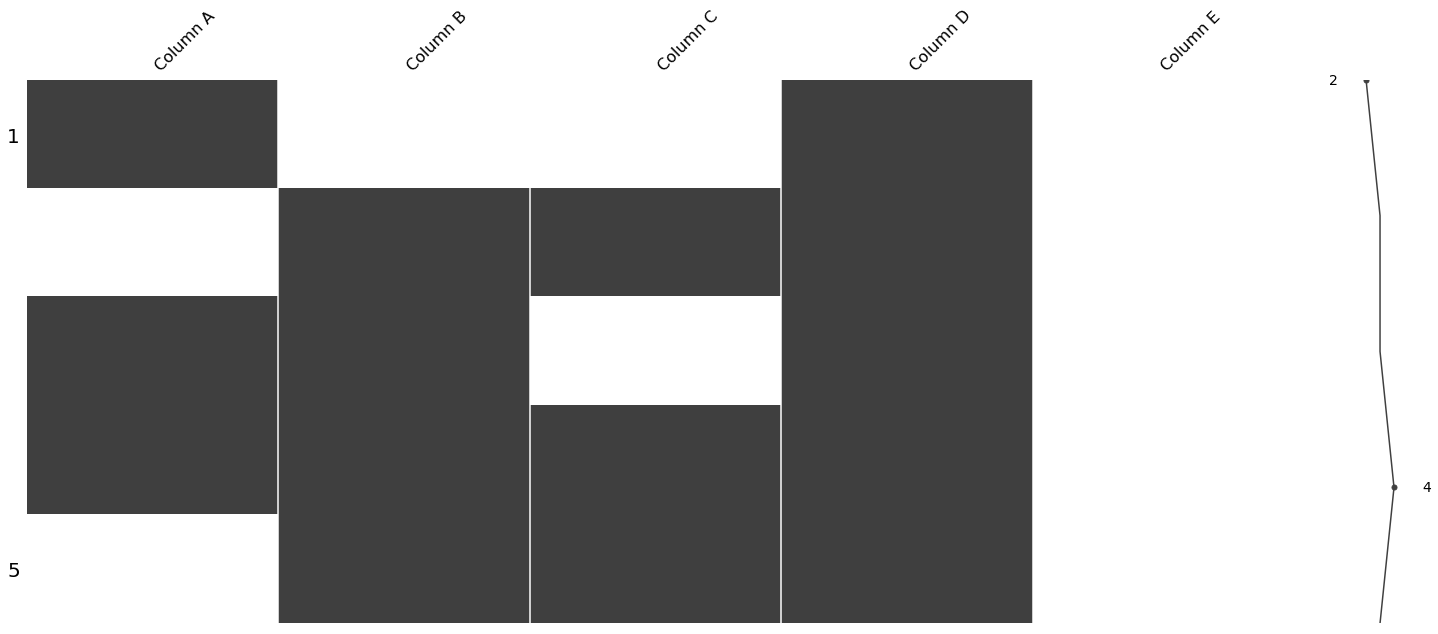

In [23]:
msno.matrix(df)

However cool the previous visualization may look, the most practical one is actually the **missingio bar**. It shows straight forward count of missing values by columns.

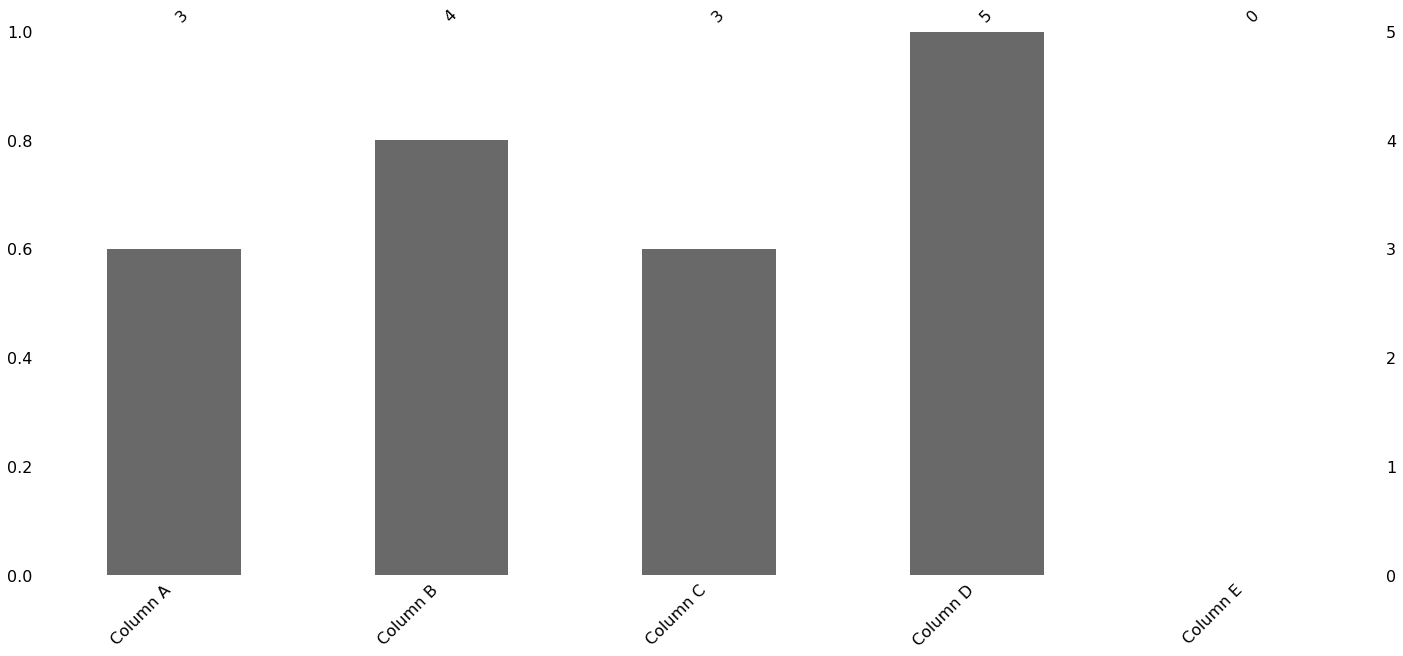

In [24]:
msno.bar(df)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Summary: common patterns to find and count null values

There are a couple of patterns we use to check if _there are any null values in our Dataframe/Series_ (the answer is `True` / `False`) and also to check _how many null values we have_. This is **very** similar to what we did with `numpy`.

In [25]:
df.head()

,Column A,Column B,Column C,Column D,Column E
0,1.0,NaN,NaN,1,NaN
1,NaN,2.0,2.0,2,NaN
2,7.0,3.0,NaN,5,NaN
3,5.0,6.0,5.0,9,NaN
4,NaN,1.0,8.0,3,NaN


##### 1) Check if _there's at least one null value_:

In [26]:
df.isna().any()

Column A     True
Column B     True
Column C     True
Column D    False
Column E     True
dtype: bool

##### 2) Check if _ALL_ are null values:

In [27]:
df.isna().all()

Column A    False
Column B    False
Column C    False
Column D    False
Column E     True
dtype: bool

##### 3) Check _how many_ null values we have:

In [28]:
df.isna().sum()

Column A    2
Column B    1
Column C    2
Column D    0
Column E    5
dtype: int64

In [29]:
df.isna().mean() * 100

Column A     40.0
Column B     20.0
Column C     40.0
Column D      0.0
Column E    100.0
dtype: float64

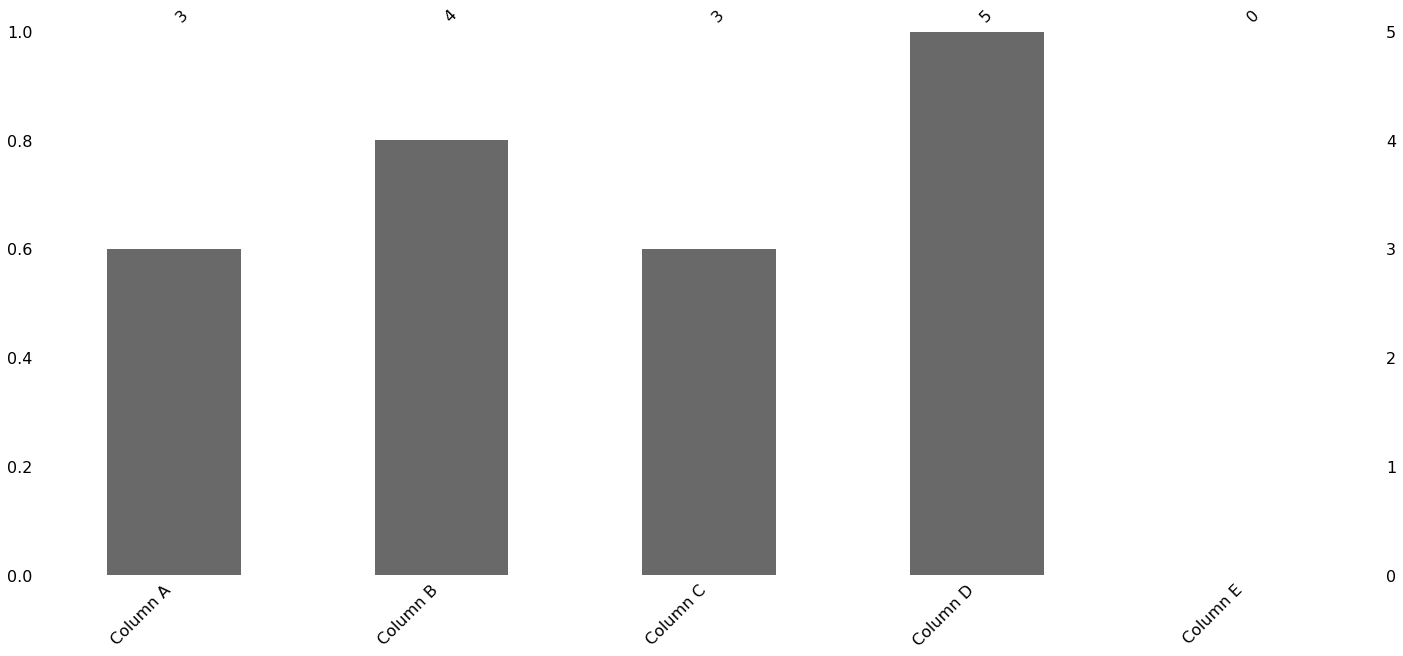

In [30]:
msno.bar(df)

##### 4) Check _how many_ \*NOT\* null values we have:

In [31]:
df.notna().sum()

Column A    3
Column B    4
Column C    3
Column D    5
Column E    0
dtype: int64

In [32]:
df.notna().mean() * 100

Column A     60.0
Column B     80.0
Column C     60.0
Column D    100.0
Column E      0.0
dtype: float64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)